# **Shinkansen Travel Experience**

## **Context**

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine-learning exercise aims to determine the relative importance of each parameter with regard to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who travelled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘**Traveldata_train.csv**’. These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labelled ‘**Surveydata_train.csv**’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labelled ‘**Overall_Experience**’.

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

## **Goal**

The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of travelling on the Shinkansen Bullet Train.

## **Dataset**

The problem consists of 2 separate datasets: **Travel data & Survey data**. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they travelled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

*   Train_Data
*   Test_Data


**Target Variable:** Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The **training set** can be used to build your machine-learning model. The training set has labels for the target column - **Overall_Experience**.

The **testing set** should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘**Overall_Experience**’ level for each participant.

## **Importing the required libraries**

In [1]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn import preprocessing

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


!pip install catboost
from catboost import CatBoostClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, accuracy_score
from sklearn import tree
from sklearn import datasets
from sklearn.datasets import make_classification

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## **Preparing the dataset**

In [2]:
# Loading the dataset
travel_train_df = pd.read_csv("Traveldata_train.csv")
survey_train_df = pd.read_csv("Surveydata_train.csv")
travel_test_df = pd.read_csv("Traveldata_test.csv")
survey_test_df = pd.read_csv("Surveydata_test.csv")

In [3]:
# Merging the datasets
df_train = pd.merge(travel_train_df, survey_train_df, on = 'ID', how = 'inner')
df_test = pd.merge(travel_test_df, survey_test_df, on = 'ID', how = 'inner')

### **Understanding the data**

In [4]:
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [5]:
df_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

#### **Observation**
- The training data has 94379 observations and 25 columns.
- Numeric type variables includes: ID, Age, Travel_Distance, Departure_Delay_in_Mins and Arrival_Delay_in_Mins. The rest of the variables are object type.
- Majority of the variables have missing values with exception of ID, Travel_Class, Travel_Distance, Overall_Experience and Seat_Class.

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

#### **Observation**
- The testing data has 35602 observations and 24 columns.
- Numeric type variables includes: ID , Age, Travel_Distance, Departure_Delay_in_Mins and Arrival_Delay_in_Mins. The rest of the variables are object type.
- Majority of the variables have missing values with exception of ID, Travel_Class, Travel_Distance and Seat_Class.

#### **Checking for the unique values in the data**

In [8]:
df_train.nunique()

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64

In [9]:
df_test.nunique()

ID                         35602
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             4644
Departure_Delay_in_Mins      350
Arrival_Delay_in_Mins        355
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              5
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 5
Ease_of_Online_Booking         6
Onboard_Service                5
Legroom                        6
Baggage_Handling               5
CheckIn_Service                5
Cleanliness                    5
Online_Boarding                6
dtype: int64

#### **Observation**
- All the variables in the train and test data have more than 1 unique value.

## **Exploratory Data Analysis**

### **Univariate Analysis**

#### **Checking the Statistical summary of the data**

In [10]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,94379.0,NaN,NaN,NaN,98847190.0,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Gender,94302,2,Female,47815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,85428,2,Loyal Customer,69823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,94346.0,NaN,NaN,NaN,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Type_Travel,85153,2,Business Travel,58617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,94379,2,Eco,49342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,94379.0,NaN,NaN,NaN,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,NaN,NaN,NaN,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,NaN,NaN,NaN,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


#### **Observation**
- There are more female than male gender with 47815	observations.
- Loyal customer is the most customer type with 69823 observations.
- The mean age of passengers was about 39 years old.
- Business is the most travel type with 58617 observations.
- Eco is the most travel class with 49342 observations.
- The maximum travel distance was 6951
- The average departure delay was around 14 minutes.
- The average arrival delay was around 15 minutes.
- About 54% of the customers had a overall experience classified as 'Satisfied'.
- Seat_Comfort and catering were acceptable to the customers most of the time.
- Green car is the most seat class with 47435 observations.
- Platform_Location was manageable to the customers most of the time.
- Arrival_Time_Convenient, Onboard_Wifi_Service, Onboard_Entertainment, Online_Support, Ease_of_Online_Booking, Onboard_Service, Legroom, Baggage_Handling, CheckIn_Service, Cleanliness and Online_Boarding were good most of the times.

In [11]:
df_test.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,35602.0,NaN,NaN,NaN,99917801.5,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Gender,35572,2,Female,18069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,32219,2,Loyal Customer,26349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,35591.0,NaN,NaN,NaN,39.446995,15.137554,7.0,27.0,40.0,51.0,85.0
Type_Travel,32154,2,Business Travel,22313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,35602,2,Eco,18473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,35602.0,NaN,NaN,NaN,1987.151761,1024.308863,50.0,1360.0,1929.0,2559.0,6868.0
Departure_Delay_in_Mins,35573.0,NaN,NaN,NaN,14.880696,37.895453,0.0,0.0,0.0,13.0,978.0
Arrival_Delay_in_Mins,35479.0,NaN,NaN,NaN,15.308802,38.531293,0.0,0.0,0.0,13.0,970.0
Seat_Comfort,35580,6,Acceptable,8003,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Observation**
- There are more female than male gender with 18069 observations.
- Loyal customer is the most customer type with 26349 observations.
- The mean age of passengers was about 39 years old.
- Business is the most travel type with 22313 observations.
- Eco is the most travel class with 18473 observations.
- The maximum travel distance was 6868
- The average departure delay was around 14 minutes.
- The average arrival delay was around 15 minutes.
- Seat Comfort and catering were acceptable to the customers most of the time.
- Ordinary is the most seat class with 17860 observations.
- Platform Location was manageable to the customers most of the time.
- The rest of the variables were good to the customers most of the times.

#### **Checking the distribution of the target variable**

In [12]:
df_train['Overall_Experience'].value_counts(normalize = True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

#### **Observation**
- 54% of the customers rated overall experience as 'Satisfied'.

#### **Checking the distributions of numerical variables**

In [13]:
# Creating numerical columns
num_cols = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'Overall_Experience']

# Creating categorical variables
cat_cols = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient',
           'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking',
           'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

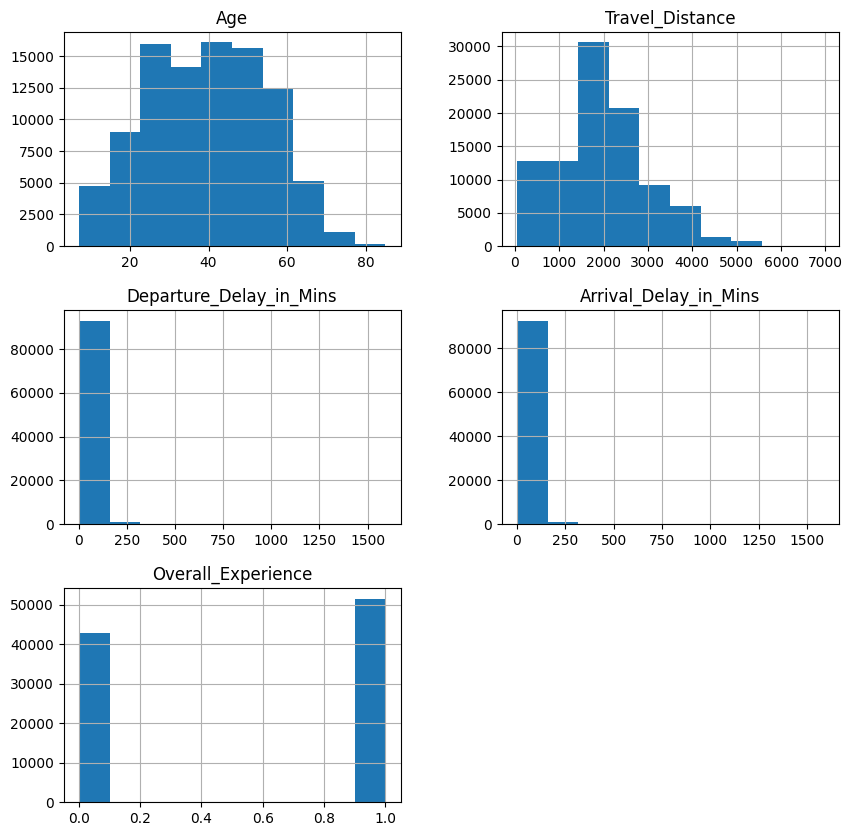

In [14]:
# Creating histograms
df_train[num_cols].hist(figsize = (10, 10))

plt.show()

#### **Observation**
- The Age variable distribution is approximately normal.
- Travel distance variable distribution is skewed to the right.
- Both departure and arrival variable distributions shows that there are very few delays.
- Majority of the customers (54%) had a overall experience classified as 'Satisfied'.

#### **Univariate analysis for categorical variables**

In [15]:
for i in cat_cols:
    print(df_train[i].value_counts(normalize = True))
    print('*'*45)

Female    0.507041
Male      0.492959
Name: Gender, dtype: float64
*********************************************
Loyal Customer       0.817332
Disloyal Customer    0.182668
Name: Customer_Type, dtype: float64
*********************************************
Business Travel    0.688373
Personal Travel    0.311627
Name: Type_Travel, dtype: float64
*********************************************
Eco         0.522807
Business    0.477193
Name: Travel_Class, dtype: float64
*********************************************
Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: Seat_Comfort, dtype: float64
*********************************************
Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
*********************************************
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improv

### **Observation**
- The proportions of male and female are almost equal i.e. 50.7% and 49.3% respectively.
- 81.73% of the customers are categorised as Loyals.
- Business is the most type of travel with 68.84%.
- Eco and Business travel class have almost the same amount of observations i.e. 52.28% & 47.72% respectively..
- Green Car and Ordinary seat class have almost the same amount of observations i.e 50.26% & 49.74% respectively.
- The rest of the variables have 'Good' as the most type of rating.

### **Bivariate and Multivariate Analysis**

#### **Relationship between Passenger satisfaction and the Numerical variables**

In [16]:
# Mean of numerical variables grouped by status
df_train.groupby(['Overall_Experience'])[num_cols].mean()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience
Overall_Experience,,,,,
0,37.49018,2025.826088,17.738600,18.392374,0.0
1,41.01968,1939.962650,12.083107,12.196763,1.0


#### **Relationship between Passenger satisfaction and the Categorical variables**

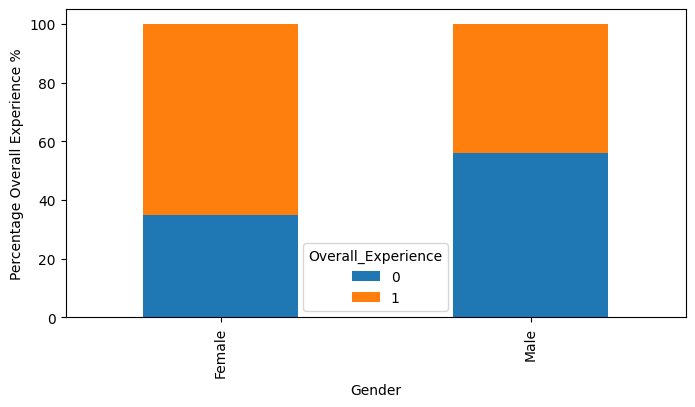

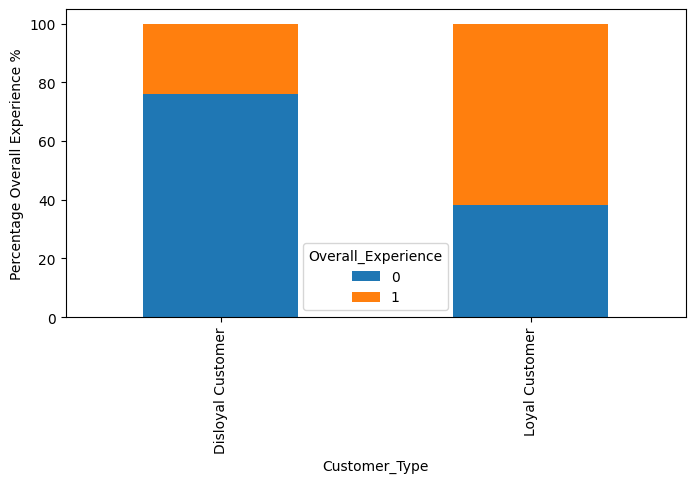

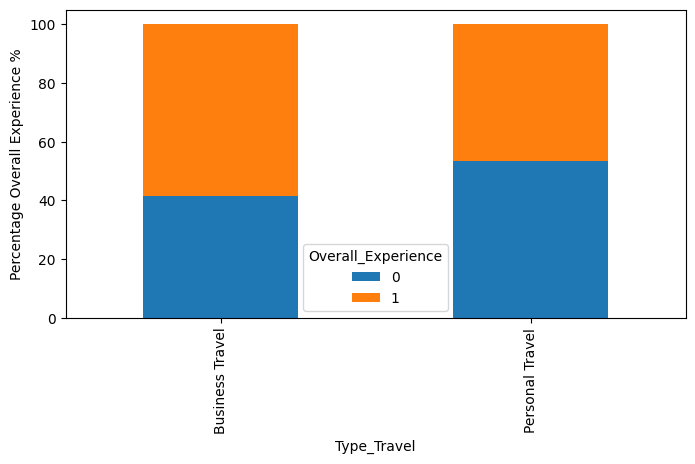

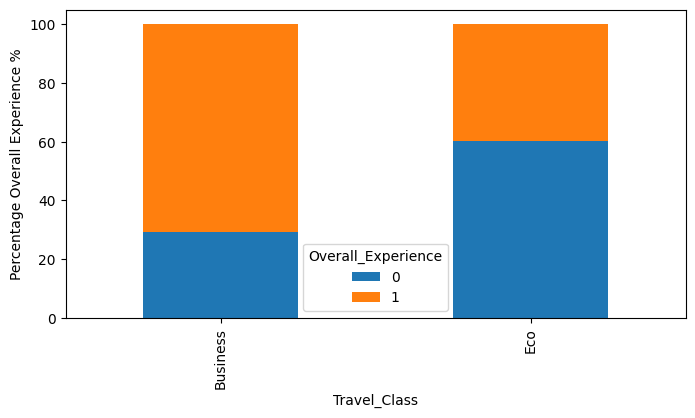

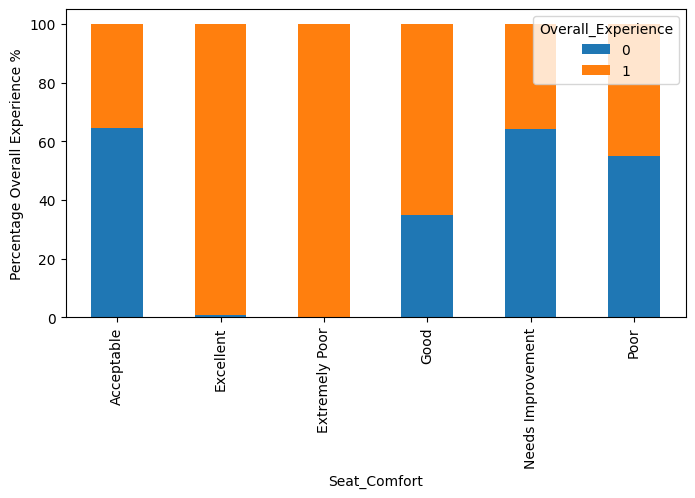

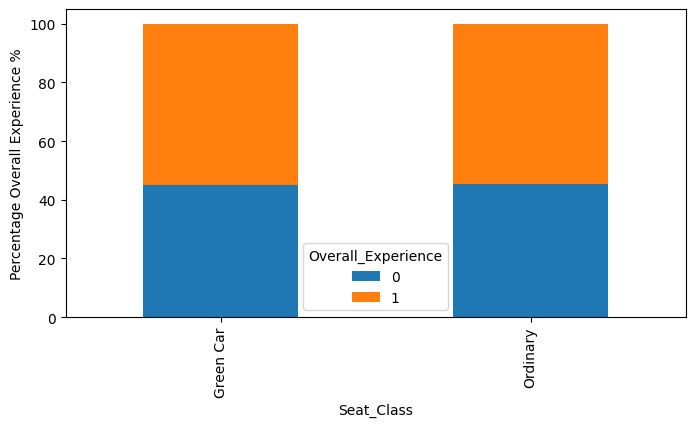

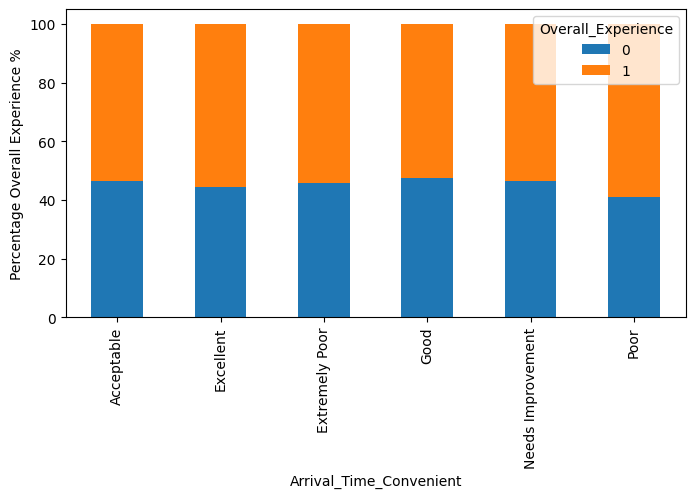

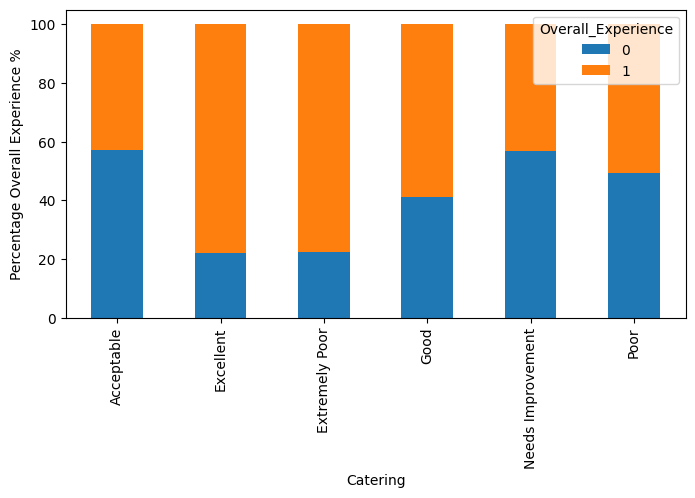

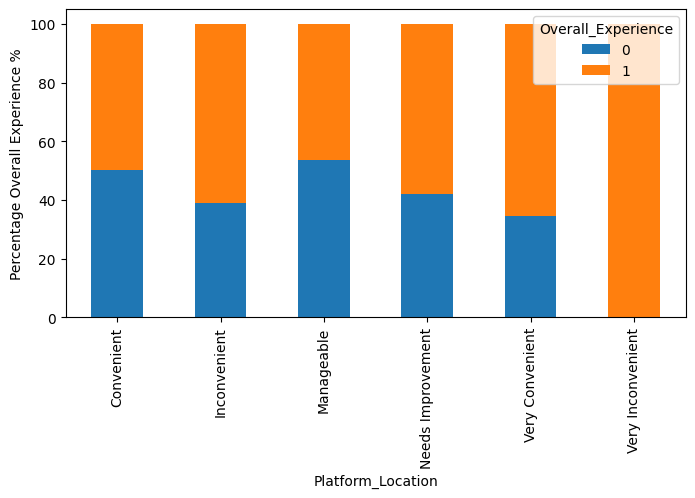

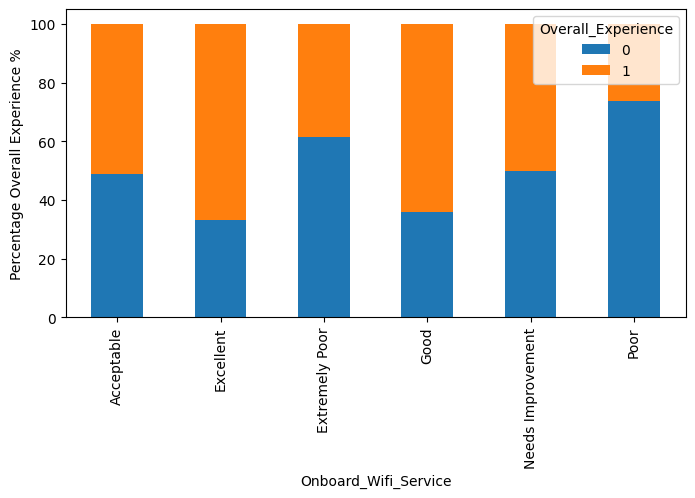

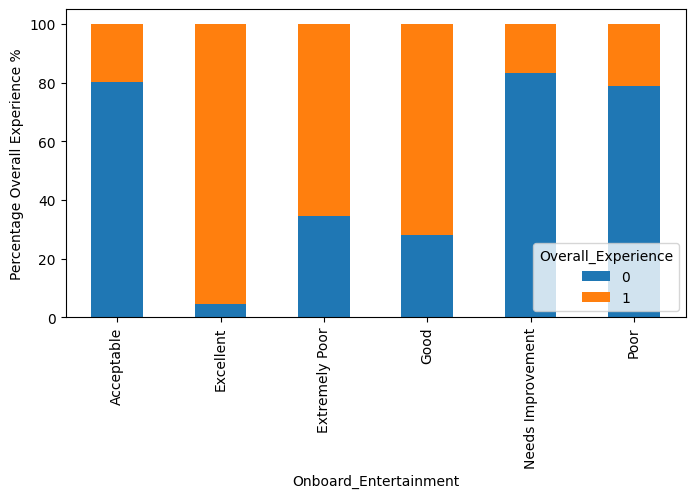

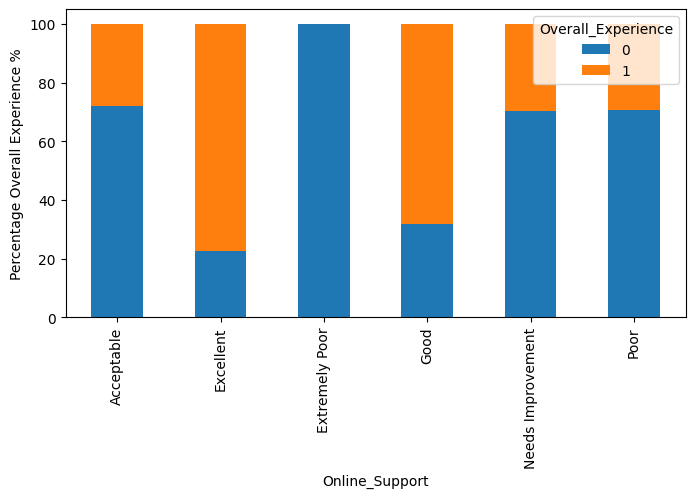

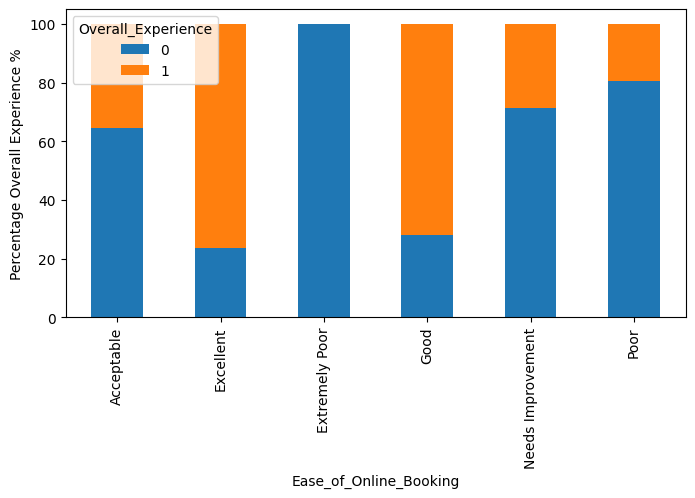

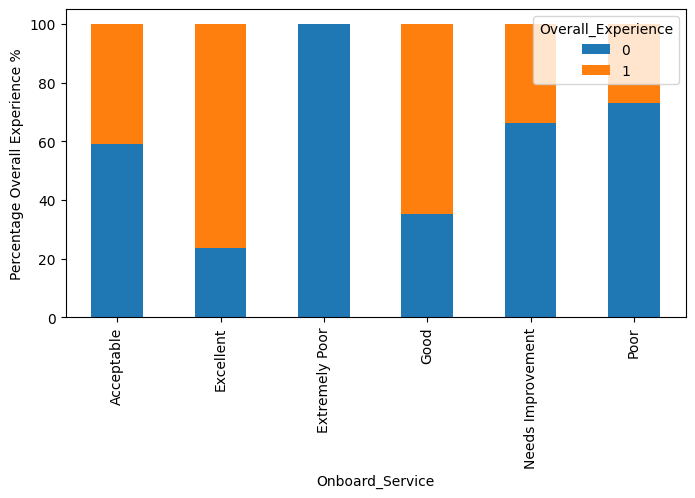

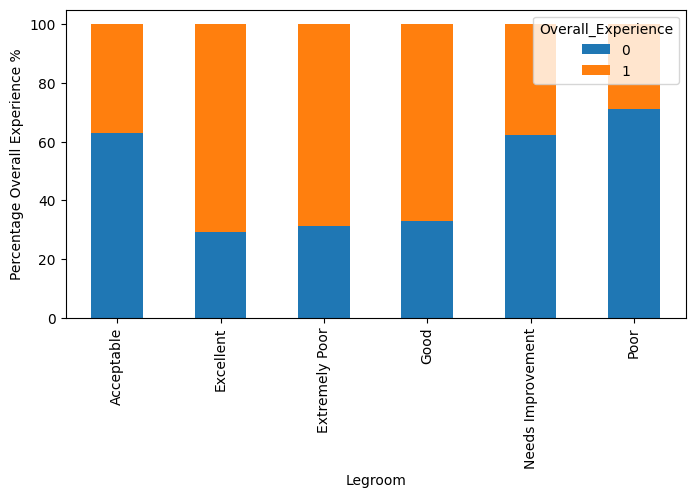

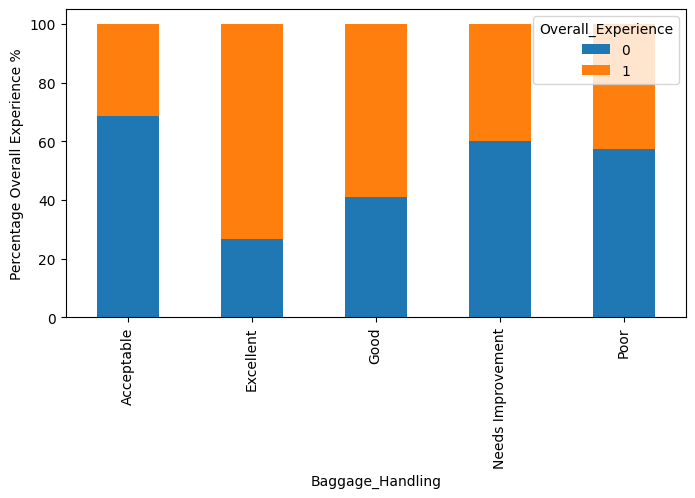

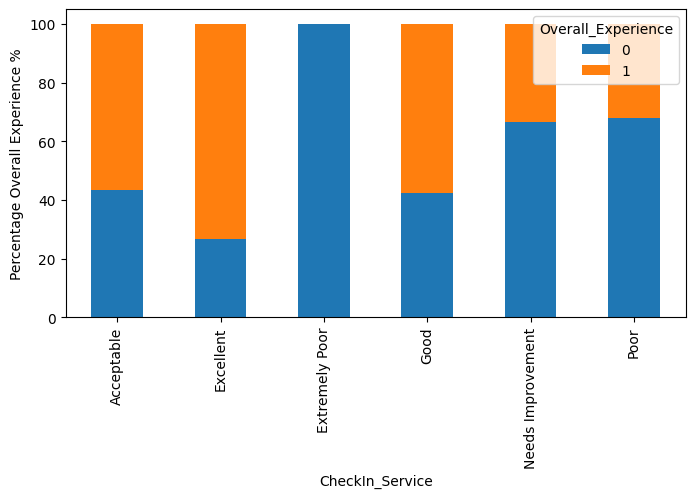

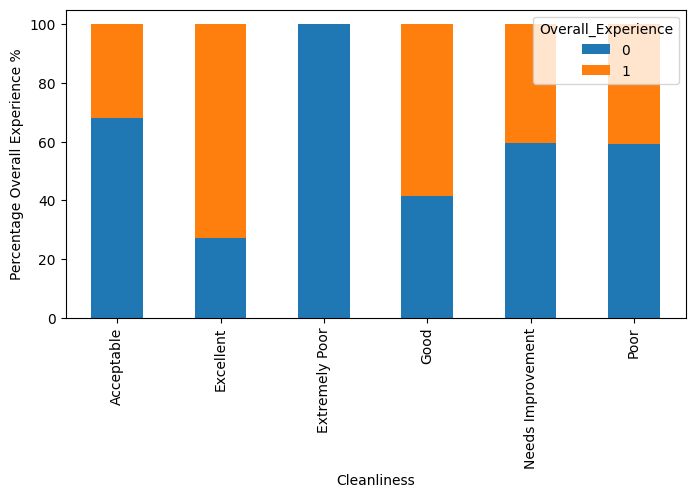

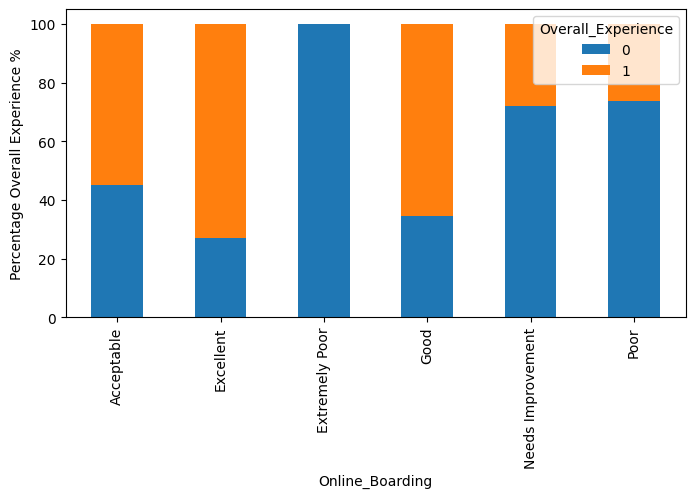

In [17]:
for i in cat_cols:
    if i != 'Overall_Experience':
        (pd.crosstab(df_train[i], df_train['Overall_Experience'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Overall Experience %')

#### **Observation**
- More than 60% of female had a Satisfied Experience compared to Males with approximately 40% rate.
- The Loyal customers have a Satisfied Experience rate of approximately 60%.
- The Business Travel type has a Satisfied Experience rate of approximately 60%.
- The Business Travel class has a Satisfied Experience rate of approximately 70%.
- There is almost a 100% Satisfied Experience rate when the seat comfort is rated 'Excellent' and 'Extremely Poor'.
- The Green car and Ordinary seat class have almost an equal Satisfied Experience rate of slightly lower than 60%.
- All the ratings under Arrival time convenient are almost equal, 'Poor' having the highest Satisfied Experience rate of approximately 60%.
- There is almost a 80% Satisfied Experience rate when catering is rated 'Excellent' and 'Extremely Poor'.
- There is almost a 100% Satisfied Experience rate when the onboard entertainment is rated as 'Excelent' and when platform location is rated 'Very Inconvenient'.
- There is almost a 70% Satisfied Experience rate when onboard wifi is rated 'Excellent' and 'Good'
- 'Excellent', 'Extremely Poor' and 'Good' rating gives the highest Satisfied Experience rate under legroom.
- 'Excellent' rating gives the highest Satisfied Experience rate under baggage handling and 'Acceptable' rating gives the least.
- There is a 0% Satisfied Experience rate when the Online Support, Ease of online booking, Onboard service, Checkin service, Cleanliness and Online boarding are rated as 'Extremely Poor'

### **Data Cleaning**

#### **Checking for missing values in the data**

In [18]:
df_train.isna().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

#### **Observations**
- ID, Travel class, Travel distance, overall experience and seat class have no missing values.
- The rest of the varaibles have missing values.

In [19]:
df_test.isna().sum()

ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

#### **Observations**
- ID, Travel class, Travel distance and seat class have no missing values.
- The rest of the varaibles have missing values.

#### **Treatment of Null values**

#### Creating copies of the datasets

In [20]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

### **Treating missing values for categorical variables**

In [21]:
null_cat_cols = ['Gender', 'Customer_Type', 'Type_Travel', 'Seat_Comfort', 'Arrival_Time_Convenient',
           'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking',
           'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

In [22]:
# Encoding Categorical Values - train data
df_train = df_train.replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [6, 5, 4, 3, 2, 1])
df_train = df_train.replace(['Male', 'Female'], [1,0])
df_train = df_train.replace(['Loyal Customer', 'Disloyal Customer'], [1,0])
df_train = df_train.replace(['Business Travel', 'Personal Travel'], [1,0])
df_train = df_train.replace(['Business', 'Eco'], [1,0])
df_train = df_train.replace(['Green Car', 'Ordinary'], [1,0])
df_train = df_train.replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'], [6, 5, 4, 3, 2, 1])

In [23]:
# Encoding Categorical Values - test data
df_test = df_test.replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [6, 5, 4, 3, 2, 1])
df_test = df_test.replace(['Male', 'Female'], [1,0])
df_test = df_test.replace(['Loyal Customer', 'Disloyal Customer'], [1,0])
df_test = df_test.replace(['Business Travel', 'Personal Travel'], [1,0])
df_test = df_test.replace(['Business', 'Eco'], [1,0])
df_test = df_test.replace(['Green Car', 'Ordinary'], [1,0])
df_test = df_test.replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'], [6, 5, 4, 3, 2, 1])

In [24]:
# Imputation using mode
# def replace_with_mode(df, cols):
#    for col in cols:
#        mode_val = df[col].mode()[0]
#        df[col].fillna(mode_val, inplace=True)

In [25]:
# replace_with_mode(df_train, null_cat_cols)
# replace_with_mode(df_test, null_cat_cols)

In [26]:
df_train_encoded = pd.get_dummies(df_train[null_cat_cols])
df_test_encoded = pd.get_dummies(df_test[null_cat_cols])

In [27]:
# Imputation using KNN Imputer
imputer = KNNImputer(n_neighbors=2)
df_train[null_cat_cols] = imputer.fit_transform(df_train_encoded)
df_test[null_cat_cols] = imputer.fit_transform(df_test_encoded)

### **Treating missing values for numerical variables**

In [28]:
null_num_cols = ['Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [29]:
# Imputation using the mean
# def replace_with_mean(df, cols):
#    for col in cols:
#        mean_value = df[col].mean()
#        df[col].fillna(mean_value, inplace=True)

In [30]:
# replace_with_mean(df_train, null_num_cols)
# replace_with_mean(df_test, null_num_cols)

In [31]:
# Imputation using the median
# def replace_with_median(df, cols):
#    for col in cols:
#        median_val = df[col].median()
#        df[col].fillna(median_val, inplace=True)

In [32]:
# replace_with_median(df_train, null_num_cols)
# replace_with_median(df_test, null_num_cols)

In [33]:
# Imputation using the mode
# def replace_with_mode(df, cols):
#    for col in cols:
#        mode_value = df[col].mode()
#        df[col].fillna(mode_value, inplace=True)

In [34]:
# replace_with_mode(df_train, null_num_cols)
# replace_with_mode(df_test, null_num_cols)

In [35]:
# Imputation using KNN Imputer
imputer = KNNImputer(n_neighbors=2)
df_train[null_num_cols] = imputer.fit_transform(df_train[null_num_cols])
df_test[null_num_cols] = imputer.fit_transform(df_test[null_num_cols])

#### **Checking if the null values have been treated**

In [36]:
df_train.isnull().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

#### **Observation**
- There are no more missing values in the train data.

In [37]:
df_test.isnull().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

#### **Observation**
- There are no more missing values in the test data.

## **Data Preprocessing**

In [38]:
# Dropping variables that cannot add value to our model from both the train and test
df_train.drop(['ID', 'Seat_Class'], axis = 1, inplace = True)
df_test.drop(['ID', 'Seat_Class'], axis = 1, inplace = True)

In [39]:
# Separating the target variable and other variables
y_train = df_train['Overall_Experience']
X_train = df_train.drop(columns = ['Overall_Experience'])

In [40]:
X_dummies = pd.get_dummies(X_train, drop_first = True)
corr_matrix = X_dummies.corr()

Xtest_dummies = pd.get_dummies(df_test, drop_first = True)

In [41]:
# Checking for the most correlated variables
threshold = 0.95
for col in corr_matrix.columns:
    for row, val in corr_matrix[col].iteritems():
        correlation = corr_matrix[col][row]
        if not col==row and correlation > threshold:
            print(f"{col}   and   {row}   correlation  = {correlation}")

Departure_Delay_in_Mins   and   Arrival_Delay_in_Mins   correlation  = 0.9657872006230444
Arrival_Delay_in_Mins   and   Departure_Delay_in_Mins   correlation  = 0.9657872006230444


In [42]:
# Dropping the correlated columns
X = X_dummies.drop(columns = ['Departure_Delay_in_Mins'])

In [43]:
Xtest = Xtest_dummies.drop(columns = ['Departure_Delay_in_Mins'])

In [44]:
X.shape

(94379, 21)

In [45]:
Xtest.shape

(35602, 21)

In [46]:
features = list(X.columns)
features_test = list(Xtest.columns)

## **Model Building**

In [47]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [48]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size = 0.3, random_state = 1)

In [49]:
X_train.shape

(66065, 21)

In [50]:
X_test.shape

(28314, 21)

In [51]:
y_train.value_counts(normalize=True) # Proportion of classess in the training data

1    0.545917
0    0.454083
Name: Overall_Experience, dtype: float64

In [52]:
y_test.value_counts(normalize=True) # Proportion of classess in the testing data

1    0.548386
0    0.451614
Name: Overall_Experience, dtype: float64

## **Decision Tree**

In [53]:
# Fitting the decision tree classifier on the training data
dtree = DecisionTreeClassifier(random_state = 1)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29999
           1       1.00      1.00      1.00     36066

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



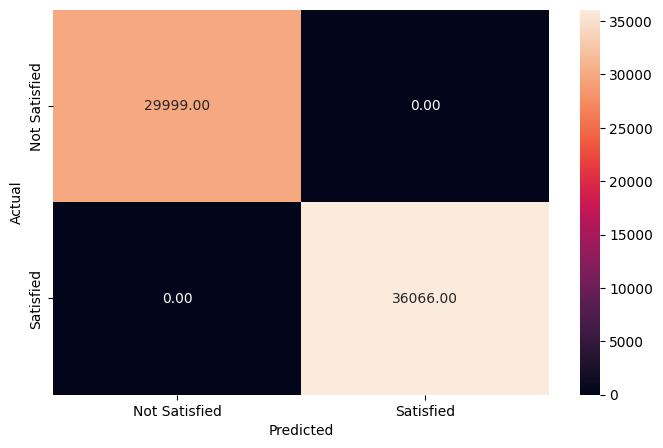

In [54]:
# Checking performance on the training data
y_train_pred_dtree = dtree.predict(X_train)

metrics_score(y_train, y_train_pred_dtree)

#### **Observation**
- The Decision tree is giving a 100% score for all metrics on the training dataset.

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     12787
           1       0.94      0.94      0.94     15527

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



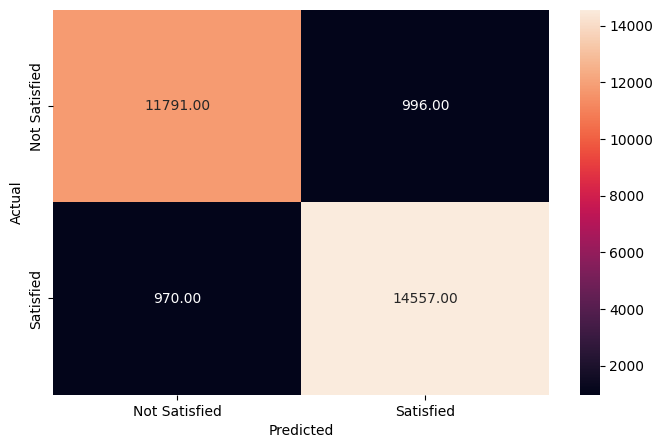

In [55]:
# Checking performance on the testing dataset
y_test_pred_dtree = dtree.predict(X_test)

metrics_score(y_test, y_test_pred_dtree)

In [56]:
accuracy_score(y_test, y_test_pred_dtree)

0.9305643851098396

#### **Observation**
- The Decision Tree works well on the training data but not so well on the testing data as there is a reduction in all the metric scores. This implies that the Decision tree is overfitting the training data.
- The accuracy on the test data suggests that there's a 7% chance that the model will predict that a customer is going to giving an overall experience rating of 'Satisfied' even though he/she would not.

## **Decision Tree Hyper paramer Tuning**

In [57]:
# Choose the type of classifier
dtree_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.545917, 1: 0.454083})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 9),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 10,n_jobs= -1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.545917, 1: 0.454083},
                       criterion='entropy', max_depth=8, min_samples_leaf=5,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     29999
           1       0.95      0.90      0.93     36066

    accuracy                           0.92     66065
   macro avg       0.92      0.92      0.92     66065
weighted avg       0.92      0.92      0.92     66065



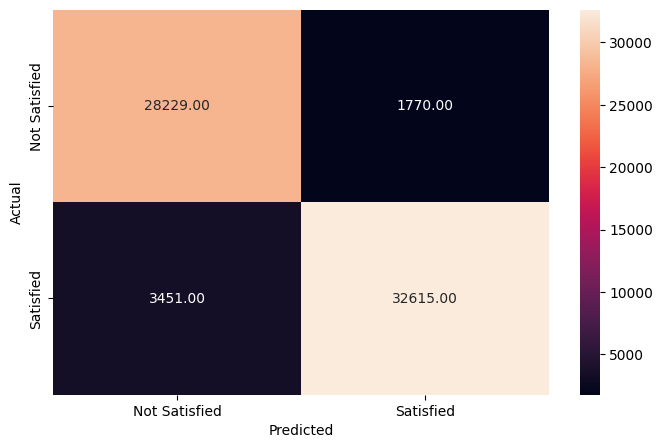

In [58]:
# Checking performance on the training dataset
y_train_pred_dtree = dtree_tuned.predict(X_train)

metrics_score(y_train, y_train_pred_dtree)

In [59]:
accuracy_score(y_train, y_train_pred_dtree)

0.9209717702262923

#### **Observation**
- In comparison to the model with default values of hyperparameters, the performance on the training set has gone down. This makes sense because we are trying to reduce overfitting.

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     12787
           1       0.95      0.90      0.92     15527

    accuracy                           0.92     28314
   macro avg       0.92      0.92      0.92     28314
weighted avg       0.92      0.92      0.92     28314



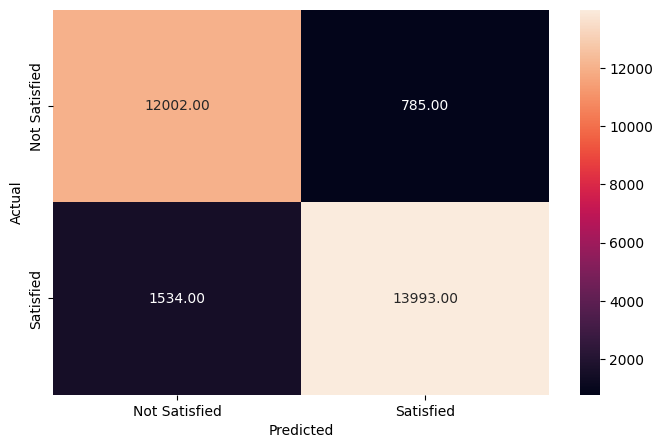

In [60]:
# Checking performance on the test dataset
y_test_pred_dtree = dtree_tuned.predict(X_test)

metrics_score(y_test, y_test_pred_dtree)

In [61]:
accuracy_score(y_test, y_test_pred_dtree)

0.9180970544606908

#### **Observation:**
- The tuned model is not performing well in comparison to the model with default values of hyperparameters.
- This model is not overfitting the training data and gives almost the same result on the test and train datasets.

<Axes: xlabel='Importance'>

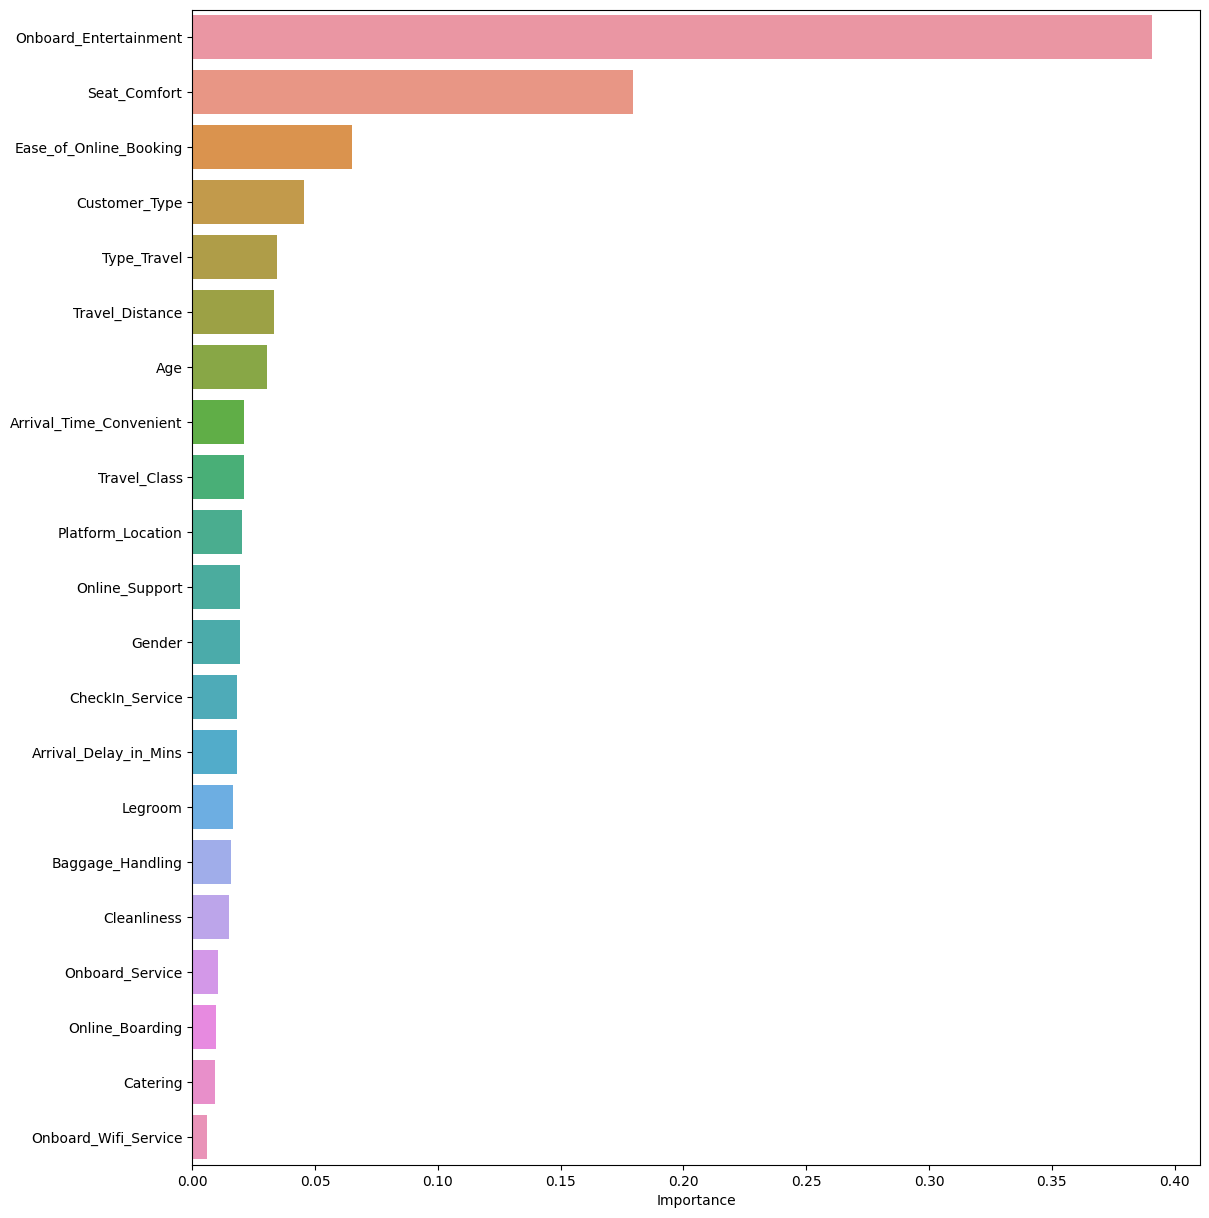

In [62]:
# Plot the feature importance of the tuned decision tree
importances = dtree.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 15))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

#### **Observation**
- Onboard entertainment and seat comfort are the most important features followed by Ease of online booking, customer type, type travel and travel distance.
- The rest of the variables have no significant impact in this model, when deciding whether a customer will give a satisfied experience rating or not.

## **Random Forest**

In [63]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.545917, 1: 0.454083}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.545917, 1: 0.454083}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29999
           1       1.00      1.00      1.00     36066

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



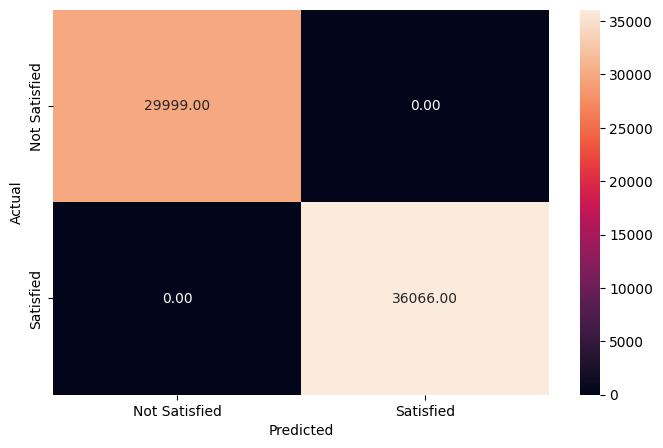

In [64]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

#### **Observation:**
- For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12787
           1       0.96      0.95      0.96     15527

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



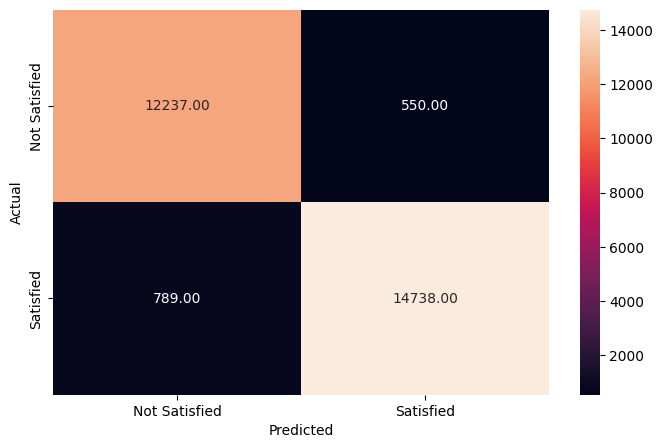

In [65]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [66]:
accuracy_score(y_test, y_pred_test_rf)

0.9527089072543617

#### **Observation:**
- The Random Forest classifier seems to be overfitting the training data.

## **Random Forest Hyperparameter tuning**

In [67]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.545917, 1: 0.454083}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [20, 50, 70],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.6, 0.8, 'auto'],
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5, n_jobs= -1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [68]:
# Fit the best algorithm to the data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.545917, 1: 0.454083},
                       max_features=0.6, n_estimators=70, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29999
           1       1.00      1.00      1.00     36066

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



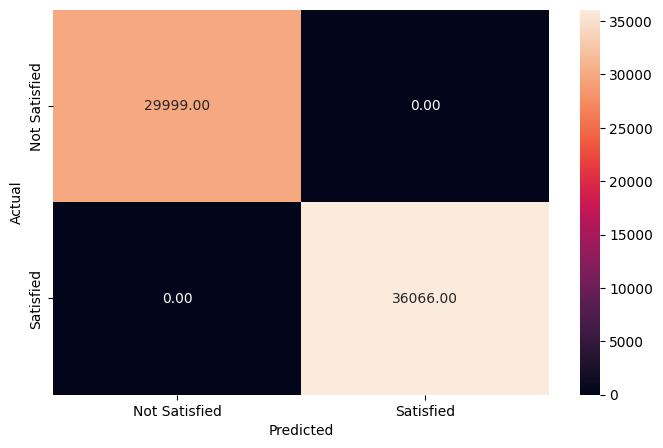

In [69]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12787
           1       0.97      0.95      0.96     15527

    accuracy                           0.96     28314
   macro avg       0.95      0.96      0.95     28314
weighted avg       0.96      0.96      0.96     28314



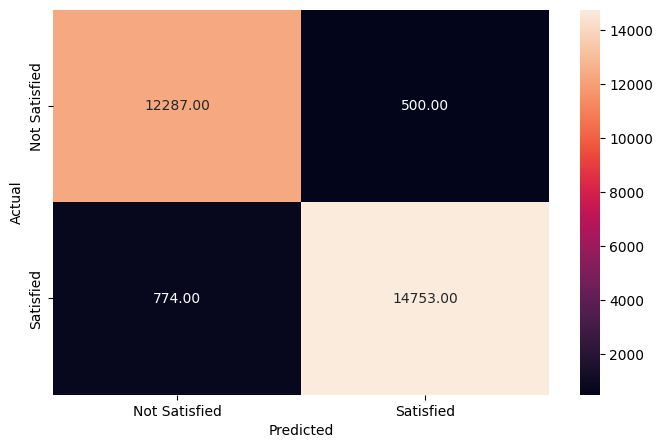

In [70]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [71]:
accuracy_score(y_test, y_pred_test_rf_tuned)

0.9550045913682277

#### **Observation:**
- The tuned model shows a good performance on the test dataset.
- Random Forest classifier performs better than the decision tree due to its higher accuracy.

## **ADA Boost**

In [72]:
# Fitting with Adaptive Boosting on top of random forest tree classifier on the training data
base = RandomForestClassifier(random_state=1, criterion='entropy')
adaboost = AdaBoostClassifier(base_estimator=base, n_estimators=70, random_state=1)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         random_state=1),
                   n_estimators=70, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29999
           1       1.00      1.00      1.00     36066

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



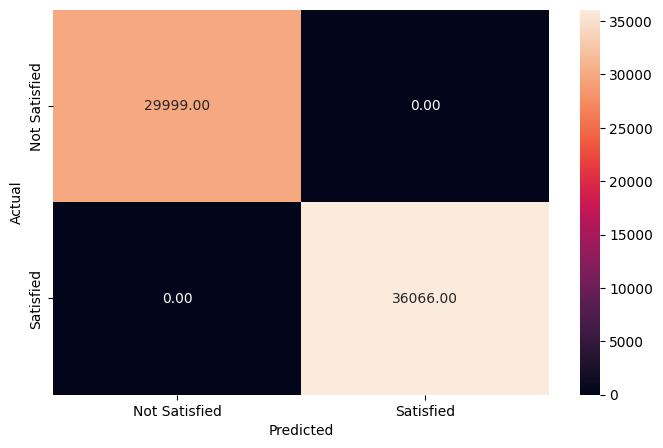

In [73]:
# Checking performance on the training data
y_pred_train_ada = adaboost.predict(X_train)

metrics_score(y_train, y_pred_train_ada)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12787
           1       0.97      0.95      0.96     15527

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



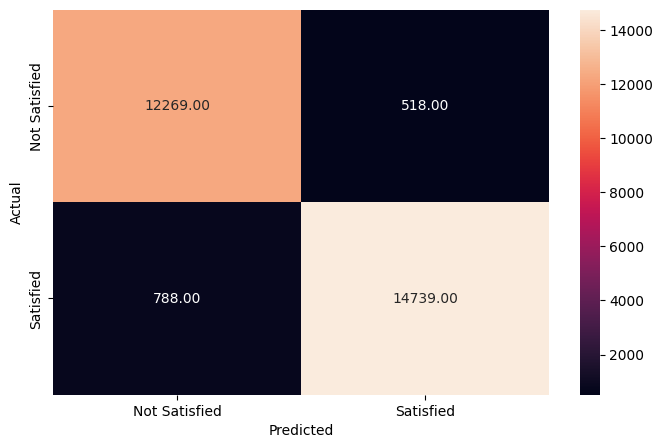

In [74]:
# Checking performance on the test data
y_pred_train_ada = adaboost.predict(X_test)

metrics_score(y_test, y_pred_train_ada)

In [75]:
accuracy_score(y_test, y_pred_train_ada)

0.9538744084198629

#### **Observation**
- The ADABoost baseline model has a lower accuracy than the Random Forest model.

## **Adaptive Boost - Hyperparameter tuning**

In [76]:
param_grid = {
    'n_estimators': [50, 80, 100],
    'learning_rate': [0.01, 0.1, 1, 1.1],
    'algorithm': ['SAMME', 'SAMME.R']
}

ada = AdaBoostClassifier()

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(ada, param_grid, cv=5, n_jobs= -1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 100}
Best score:  0.9035343979414213


In [77]:
# Create a new AdaBoostClassifier with the best hyperparameters
best_ada = AdaBoostClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                              learning_rate=grid_search.best_params_['learning_rate'],
                              algorithm=grid_search.best_params_['algorithm'])

# Fit the new AdaBoostClassifier with the best hyperparameters
best_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     12787
           1       0.92      0.91      0.91     15527

    accuracy                           0.90     28314
   macro avg       0.90      0.90      0.90     28314
weighted avg       0.90      0.90      0.90     28314



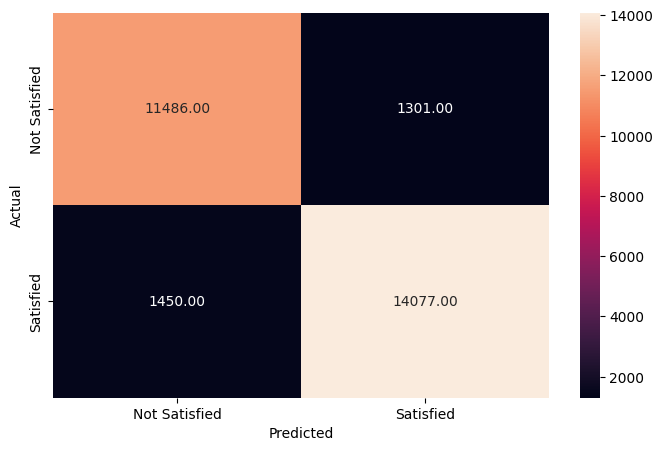

In [78]:
# Checking performance on the training data
y_pred_train_ada = best_ada.predict(X_test)

metrics_score(y_test, y_pred_train_ada)

In [79]:
accuracy_score(y_test, y_pred_train_ada)

0.9028395846577665

#### **Observation**
- The tuned AdaBoost model exhibits lower accuracy compared to the Random Forest model, suggesting that it may not be the optimal choice for this particular task.

## XGBoost - Hyperparameter tuning

In [80]:
# Splitting the data into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.15, random_state = 1)

In [81]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import log_loss
import xgboost as xgb

# Define the objective function for hyperopt
def objective(params):
    # Load the training data
    d_train = xgb.DMatrix(X_train1, label=y_train1)

    # Set the XGBoost parameters
    xgb_params = {
        'learning_rate': params['learning_rate'],
        'max_depth': int(params['max_depth']),
        'subsample': params['subsample'],
        'gamma': params['gamma'],
        'colsample_bytree': params['colsample_bytree'],
        'objective': 'binary:logistic',
        'nthread': -1,
        'n_jobs': -1,
        'seed': 7
    }

    # Train the XGBoost model
    model = xgb.train(xgb_params, d_train)

    # Make predictions on the test set
    d_test = xgb.DMatrix(X_test1)
    y_pred = model.predict(d_test)

    # Compute the log loss
    loss = log_loss(y_test1, y_pred)

    return {'loss': loss, 'status': STATUS_OK}

# Define the hyperparameters to search over
space = {
    'n_estimators': 150,
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.4),
    'max_depth': hp.quniform('max_depth', 2, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
}

# Set up the hyperparameter search
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
best

100%|██████████| 100/100 [00:34<00:00,  2.93trial/s, best loss: 0.1276385604451304]


{'colsample_bytree': 0.9742754784359228,
 'gamma': 0.2752504200542639,
 'learning_rate': 0.39403022002827076,
 'max_depth': 10.0,
 'subsample': 0.7710080675716131}

In [82]:
xgb_params = {
        'n_estimators': 100,
        'learning_rate': best['learning_rate'],
        'max_depth': int(best['max_depth']),
        'subsample': best['subsample'],
        'gamma': best['gamma'],
        'colsample_bytree': best['colsample_bytree'],
        'objective': 'binary:logistic',
        'nthread': -1,
        'n_jobs': -1,
        'seed': 1
}

xgb_model = xgb.XGBRegressor(**xgb_params)
xgb_model.fit(X_train1, y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9742754784359228, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.2752504200542639,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.39403022002827076,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1, nthread=-1,
             num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4496
           1       0.96      0.95      0.95      5414

    accuracy                           0.95      9910
   macro avg       0.95      0.95      0.95      9910
weighted avg       0.95      0.95      0.95      9910



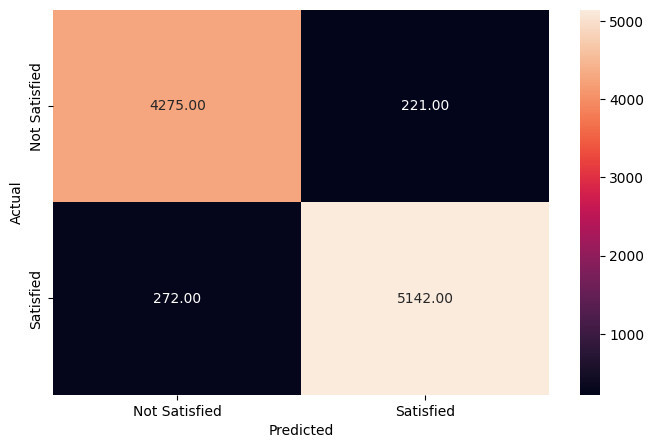

In [83]:
y_pred_train_xgb = xgb_model.predict(X_test1)
y_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred_train_xgb]
metrics_score(y_test1, y_pred_binary)

In [84]:
accuracy_score(y_test1, y_pred_binary)

0.9502522704339051

#### **Observation**
- The XGBoost model outperforms the AdaBoost model in accuracy but falls short compared to the Random Forest model in terms of its predictive performance.

## **CatBoost**

In [85]:
#Fitting a CatBoostClassifier
cbc = CatBoostClassifier(verbose=0)
grid = {'max_depth': [3,5,8],'n_estimators':[100,120,150], 'learning_rate':[0.01,0.04,0.07]}
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5, n_jobs = -1)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7841cb2ad7b0>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.04, 0.07],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [100, 120, 150]},
             scoring='accuracy')

In [86]:
#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

0.9537425262998562
{'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150}


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12787
           1       0.96      0.95      0.96     15527

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



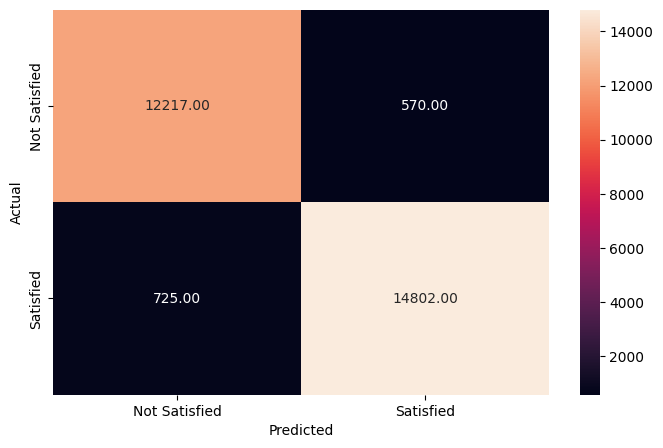

In [87]:
# Checking performance on the testing data
y_pred_test_cb = gscv.predict(X_test)

metrics_score(y_test, y_pred_test_cb)

In [88]:
# Initialize the CatBoost classifier with a learning rate of 0.07 and n estimators of 8
clf = CatBoostClassifier(max_depth=8, learning_rate=0.07)
# Fit the classifier to the training data
clf.fit(X_train, y_train, verbose=False)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     12787
           1       0.97      0.96      0.96     15527

    accuracy                           0.96     28314
   macro avg       0.96      0.96      0.96     28314
weighted avg       0.96      0.96      0.96     28314



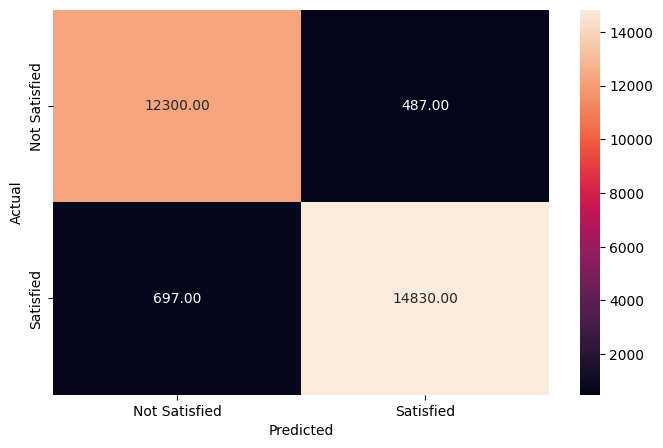

In [89]:
# Checking performance on the testing data
y_pred_test_cb = clf.predict(X_test)

metrics_score(y_test, y_pred_test_cb)

In [90]:
accuracy_score(y_test, y_pred_test_cb)

0.9581832309105036

#### **Observation**
- CatBoost is the best model with an accuracy of 0.958183 when the max_depth is 8 and learning rate is 0.07

## **SUBMISSION**

In [91]:
Xtest.shape

(35602, 21)

In [92]:
Xtest2 = df_test.copy()
predicted = clf.predict(Xtest)
Xtest2['Overall_Experience'] = predicted
Xtest2['ID'] = pd.DataFrame({'ID': range(99900001, 99935603)})
submit = Xtest2[['ID', 'Overall_Experience']]

submit.to_csv('Submission_10.csv', index=False)